In [1]:
import numpy as np


def life_step_gen_expr(x):
    nbrs_count = sum(np.roll(np.roll(x, i, 0), j, 1)
                     for i in (-1, 0, 1)
                     for j in (-1, 0, 1)
                     if (i != 0 or j != 0))
    return (nbrs_count == 3) | (x & nbrs_count == 2)


def life_step_scipy(x):
    from scipy.signal import convolve2d
    nbrs_count = convolve2d(x, np.ones((3, 3)), mode='same', boundary='wrap')
    return (nbrs_count == 3) | (x & nbrs_count == 2)


life_step = life_step_gen_expr

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
from JSAnimation.IPython_display import display_animation
import matplotlib.pyplot as plt
from matplotlib import animation


def life_animation(x, dpi=10, frames=10, interval=300, mode='loop'):
    x = np.asarray(x)
    assert x.ndim == 2
    x = x.astype(bool)
    
    x_blank = np.zeros_like(x)
    figsize = (x.shape[1] * 1. / dpi, x.shape[0] * 1. / dpi)
    
    fig = plt.figure(figsize=figsize, dpi=dpi)
    ax = fig.add_axes([0, 0, 1, 1], xticks=[], yticks=[], frameon=False)
    im = ax.imshow(x, cmap=plt.cm.binary, interpolation='nearest')
    im.set_clim(-0.05, 1)  # make background gray
    
    # initialization function: plot the background of each frame
    def init():
        im.set_data(x_blank)
        return im,   
    
    # animation function.  This is called sequentially
    def animate(i):
        im.set_data(animate.x)
        animate.x = life_step(animate.x)
        return im,
    
    animate.x = x
    anim = animation.FuncAnimation(fig, animate, init_func=init, frames=frames, interval=interval)  
    return display_animation(anim, default_mode=mode)

C:\Users\admin\PycharmProjects\machinery\venv\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  


<script language="javascript">
  /* Define the Animation class */
  function Animation(frames, img_id, slider_id, interval, loop_select_id){
    this.img_id = img_id;
    this.slider_id = slider_id;
    this.loop_select_id = loop_select_id;
    this.interval = interval;
    this.current_frame = 0;
    this.direction = 0;
    this.timer = null;
    this.frames = new Array(frames.length);

    for (var i=0; i<frames.length; i++)
    {
     this.frames[i] = new Image();
     this.frames[i].src = frames[i];
    }
    document.getElementById(this.slider_id).max = this.frames.length - 1;
    this.set_frame(this.current_frame);
  }

  Animation.prototype.get_loop_state = function(){
    var button_group = document[this.loop_select_id].state;
    for (var i = 0; i < button_group.length; i++) {
        var button = button_group[i];
        if (button.checked) {
            return button.value;
        }
    }
    return undefined;
  }

  Animation.prototype.set_frame = function(frame){
    this.current_frame = frame;
    document.getElementById(this.img_id).src = this.frames[this.current_frame].src;
    document.getElementById(this.slider_id).value = this.current_frame;
  }

  Animation.prototype.next_frame = function()
  {
    this.set_frame(Math.min(this.frames.length - 1, this.current_frame + 1));
  }

  Animation.prototype.previous_frame = function()
  {
    this.set_frame(Math.max(0, this.current_frame - 1));
  }

  Animation.prototype.first_frame = function()
  {
    this.set_frame(0);
  }

  Animation.prototype.last_frame = function()
  {
    this.set_frame(this.frames.length - 1);
  }

  Animation.prototype.slower = function()
  {
    this.interval /= 0.7;
    if(this.direction > 0){this.play_animation();}
    else if(this.direction < 0){this.reverse_animation();}
  }

  Animation.prototype.faster = function()
  {
    this.interval *= 0.7;
    if(this.direction > 0){this.play_animation();}
    else if(this.direction < 0){this.reverse_animation();}
  }

  Animation.prototype.anim_step_forward = function()
  {
    this.current_frame += 1;
    if(this.current_frame < this.frames.length){
      this.set_frame(this.current_frame);
    }else{
      var loop_state = this.get_loop_state();
      if(loop_state == "loop"){
        this.first_frame();
      }else if(loop_state == "reflect"){
        this.last_frame();
        this.reverse_animation();
      }else{
        this.pause_animation();
        this.last_frame();
      }
    }
  }

  Animation.prototype.anim_step_reverse = function()
  {
    this.current_frame -= 1;
    if(this.current_frame >= 0){
      this.set_frame(this.current_frame);
    }else{
      var loop_state = this.get_loop_state();
      if(loop_state == "loop"){
        this.last_frame();
      }else if(loop_state == "reflect"){
        this.first_frame();
        this.play_animation();
      }else{
        this.pause_animation();
        this.first_frame();
      }
    }
  }

  Animation.prototype.pause_animation = function()
  {
    this.direction = 0;
    if (this.timer){
      clearInterval(this.timer);
      this.timer = null;
    }
  }

  Animation.prototype.play_animation = function()
  {
    this.pause_animation();
    this.direction = 1;
    var t = this;
    if (!this.timer) this.timer = setInterval(function(){t.anim_step_forward();}, this.interval);
  }

  Animation.prototype.reverse_animation = function()
  {
    this.pause_animation();
    this.direction = -1;
    var t = this;
    if (!this.timer) this.timer = setInterval(function(){t.anim_step_reverse();}, this.interval);
  }
</script>

<div class="animation" align="center">
    <img id="_anim_imgQUELZCMYVYEHNQPB">
    <br>
    <input id="_anim_sliderQUELZCMYVYEHNQPB" type="range" style="width:350px" name="points" min="0" max="1" step="1" value="0" onchange="animQUELZCMYVYEHNQPB.set_frame(parseInt(this.value));"></input>
    <br>
    <button onclick="animQUELZCMYVYEHNQPB.slower()">&#8211;</button>
    <button onclick="animQUELZCMYVYEHNQPB.first_frame
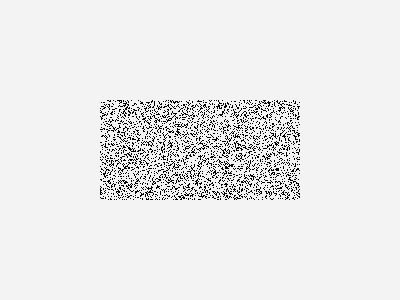
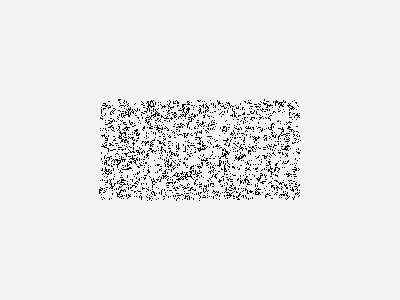
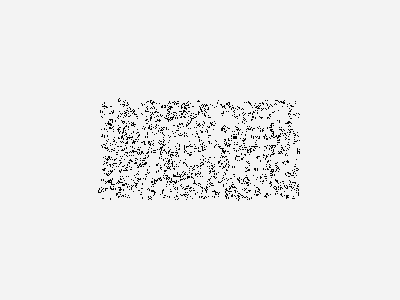
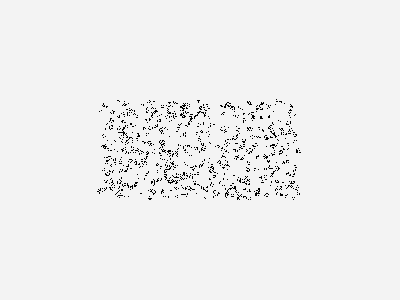
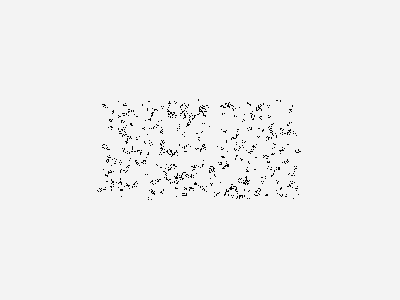
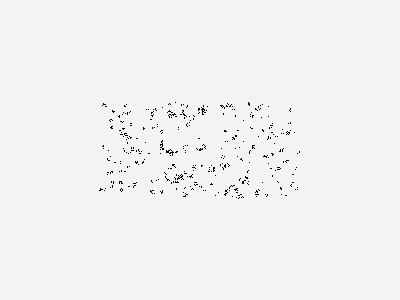
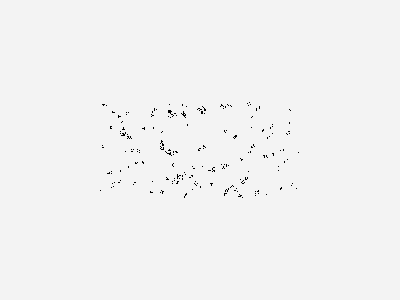
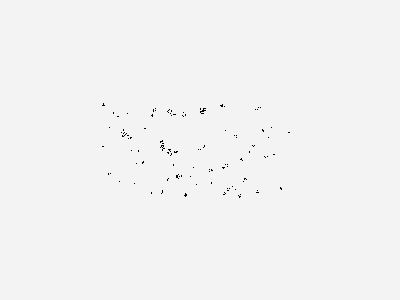
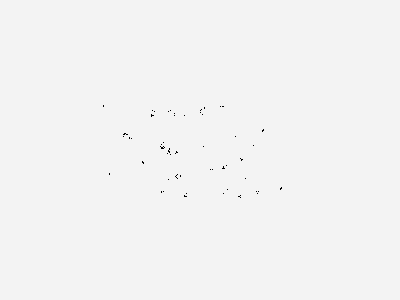
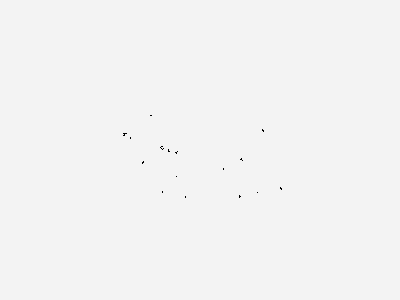
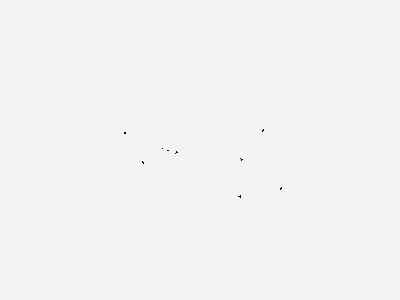
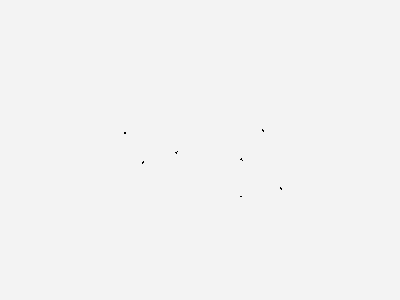
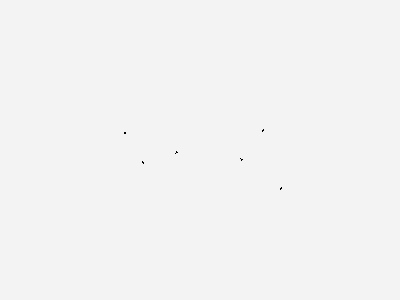
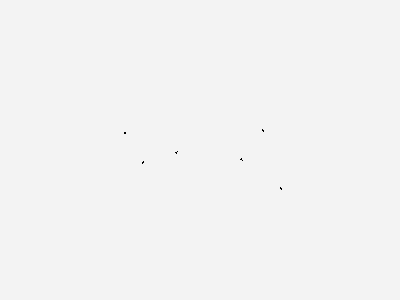
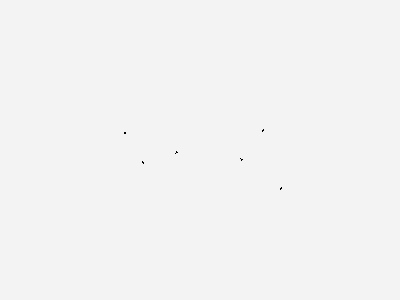
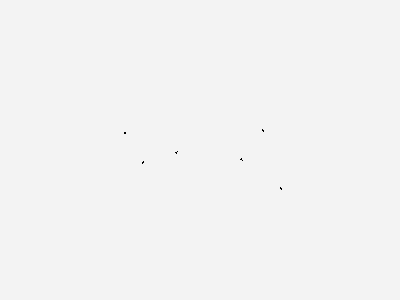
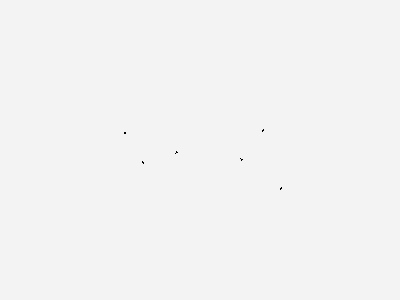
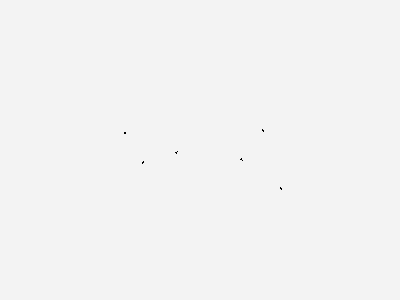
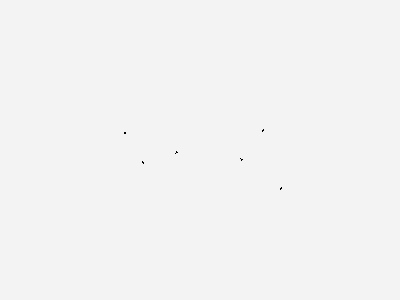
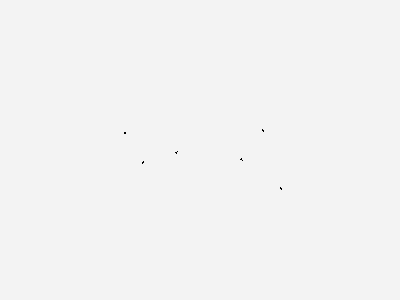

In [4]:
np.random.seed(0)
x = np.zeros((300, 400), dtype=bool)
r = np.random.random((100, 200))
x[100:200, 100:300] = (r > 0.75)
life_animation(x, dpi=10, frames=20, mode='once')